In [1]:
from astrodynamicsbook.bookhelpers import *
import matplotlib.animation
from IPython.display import HTML
from angutils import angutils

In [2]:
%matplotlib widget

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a1, = ax.plot([0,1],[0,0],[0,0],'r',linewidth=5)
a2, = ax.plot([0,0],[0,1],[0,0],'g',linewidth=5)
a3, = ax.plot([0,0],[0,0],[0,1],'b',linewidth=5)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

rotsteps = 5
rotSet = [3,2]
rotangs = np.array([360,360])*np.pi/180

Rs = []
currDCM = np.eye(3)
for rotax, rotang in zip(rotSet, rotangs):
    currax = currDCM[:,rotax-1]
    Rs.append(angutils.calcDCM(currax, rotang/rotsteps))
    currDCM = np.matmul( angutils.calcDCM(currax, rotang), currDCM )

def animate(i, Rs, axs):
    ax.set_title(f"{i}")
    if i == 0:
        return None

    R = Rs[np.digitize(i, np.arange(len(rotSet))*rotsteps + 1)-1]
    for a in axs:
        a.set_data_3d(np.matmul(R, np.vstack(a.get_data_3d())))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(rotSet)*rotsteps+1, fargs=(Rs,[a1, a2, a3]) ,interval=500)
plt.close()
HTML(ani.to_jshtml())

In [86]:
np.arange(len(rotSet))*rotsteps

array([0, 5])

In [99]:
np.digitize(6, np.arange(len(rotSet))*rotsteps + 1)

2

In [62]:
rotsteps = 5
rotSet = [3,2]
rotangs = np.array([60,45])*np.pi/180

Rs = []
currDCM = np.eye(3)
for rotax, rotang in zip(rotSet, rotangs):
    ax = currDCM[:,rotax-1]
    Rs.append(angutils.calcDCM(ax, rotang/rotsteps))
    currDCM = np.matmul( angutils.calcDCM(ax, rotang), currDCM )

In [63]:
Rs

[array([[ 0.9781476 , -0.20791169,  0.        ],
        [ 0.20791169,  0.9781476 ,  0.        ],
        [ 0.        ,  0.        ,  1.        ]]),
 array([[ 0.99692209, -0.0053311 ,  0.07821723],
        [-0.0053311 ,  0.99076626,  0.13547622],
        [-0.07821723, -0.13547622,  0.98768834]])]

(-1.0, 1.0)

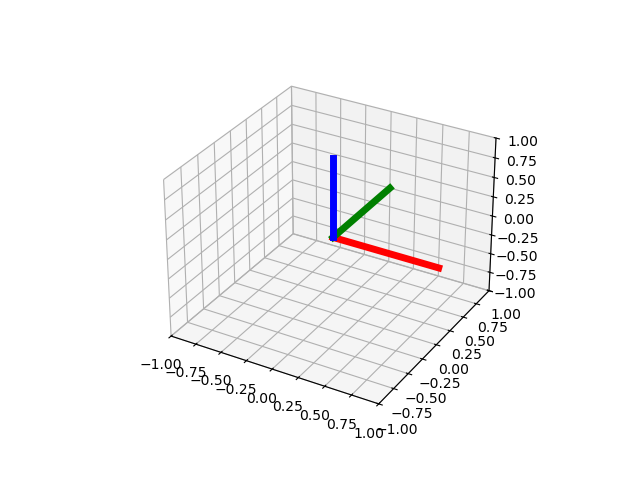

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a1, = ax.plot([0,1],[0,0],[0,0],'r',linewidth=5)
a2, = ax.plot([0,0],[0,1],[0,0],'g',linewidth=5)
a3, = ax.plot([0,0],[0,0],[0,1],'b',linewidth=5)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

In [34]:
for a in [a1, a2, a3]:
    a.set_data_3d(np.matmul(angutils.rotMat(3, -60*np.pi/180), np.vstack(a.get_data_3d())))

In [64]:
ax = np.matmul(angutils.rotMat(3, -60*np.pi/180),[0,1,0])
R2 = angutils.calcDCM(ax, 45*np.pi/180)
R2

array([[ 0.9267767 , -0.12682648,  0.35355339],
       [-0.12682648,  0.78033009,  0.61237244],
       [-0.35355339, -0.61237244,  0.70710678]])

In [61]:
angutils.rotMat(3, -60*np.pi/180)[:,1]

array([-0.8660254,  0.5      ,  0.       ])

In [40]:
angutils.calcDCM([0,0,1], 60*np.pi/180)

array([[ 0.5      , -0.8660254,  0.       ],
       [ 0.8660254,  0.5      ,  0.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [56]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])